# Beispiel zum Thema Fixpoint-Quantisierung #

Demonstriere:
- Quantisierungskennlinie
- Wellenform eines quantisierten Signals

bei verschiedenen Arten der Quantisierung und des Überlaufverhaltens.

In [5]:
from __future__ import print_function, division
import os, sys
import time

module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)
import dsp_fpga_lib as dsp # import and set plot properties
import dsp_fpga_fix_lib as fx

import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline

# plt.style.use('../script.mplstyle')
import numpy as np
from numpy import sin, cos, tan, angle, pi, array, arange, log10, zeros, \
  linspace, ones, sqrt

plt.rcParams["figure.figsize"] = [9, 5]

In diesem Kapitel nutzen wir die Fixpointbibliothek `dsp_lib_fix.py`. Sie benötigen zunächst ein Dictionary (hier: `q_dict`), in dem das Format `QI.QF` am Ausgang des Quantisierers und sein Quantisierungs- und Überlaufverhalten definiert sind. 

Danach wird mit `Q = fx.Fixed(q_dict)` eine Instanz der Fixpointklasse `Fixed()` mit den definierten Quantisierungsoptionen instantiiert. Als Parameter können angegeben werden:
- '**QI**' : Anzahl der Integerbits
- '**QF**' : Anzahl der Fractionalbits
- '**quant**' : Art der Requantisierung
- '**ovfl**' : Überlaufverhalten

Lassen Sie sich mit `?fx.Fixed()` die Optionen anzeigen.

Das folgende Beispiel zeigt das Prinzip:

In [6]:
q_dict = {'QI':0, 'QF': 3,                 # number of ingeger and fractional bits
          'quant':'floor', 'ovfl': 'wrap'} # quantization and overflow behaviour
Q1 = fx.Fixed(q_dict)                      # instance of fixpoint class Fixed()
for i in np.arange(12)/10:                 # i = 0, 0.1, 0.2, ...
    print("q< {0:>3.2f} > = {1:>5.3f}".format(i, Q1.fix(i))) # quantize i
# ?fx.Fixed() # show docstring / options of class Fixed()

q< 0.00 > = 0.000
q< 0.10 > = 0.000
q< 0.20 > = 0.125
q< 0.30 > = 0.250
q< 0.40 > = 0.375
q< 0.50 > = 0.500
q< 0.60 > = 0.500
q< 0.70 > = 0.625
q< 0.80 > = 0.750
q< 0.90 > = 0.875
q< 1.00 > = -1.000
q< 1.10 > = -1.000



Im folgenden werden ein Sinussignal *a* und eine Rampe *x* quantisiert, mit *x* wird die Quantisierungskennlinie dargestellt:

2734 Überläufe für Sinussignal
Total CPU time: 1.4386 ms


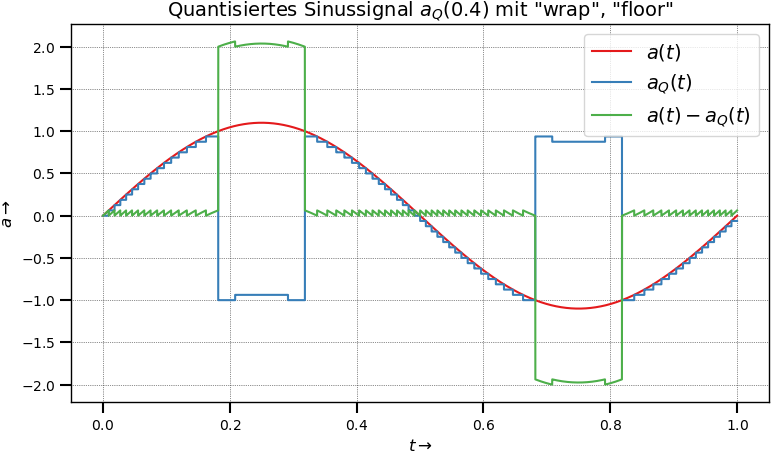

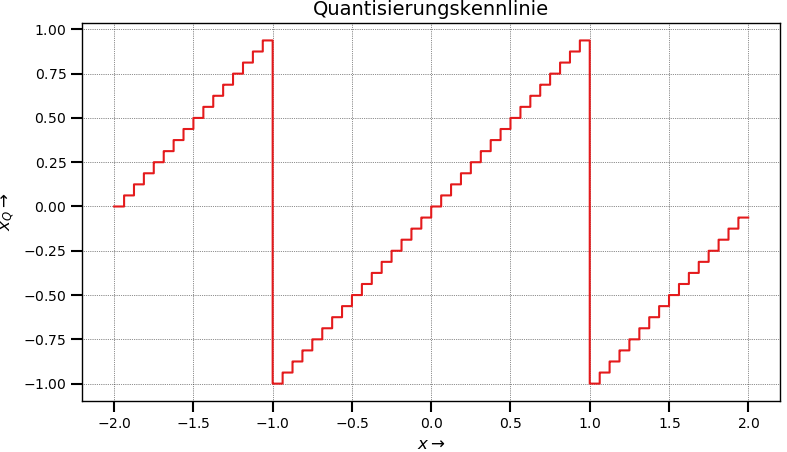

In [7]:
N = 10000; f_a = 1
t = linspace(0, 1, N, endpoint=False)
a = 1.1 * sin(2 * pi * f_a * t)
x = linspace(-2, 2, N, endpoint=False) 
#
q_dict = {'QI':0, 'QF': 4, 'quant':'floor', 'ovfl': 'wrap'} # try 'round' ; 'sat'
Q = fx.Fixed(q_dict) # quantizer instance with parameters defined above

t_cpu = time.clock()

aq = Q.fix(a) # quantize a
print('{0} Überläufe für Sinussignal'.format(Q.N_over))
xq = Q.fix(x) # quantize x

print ('Total CPU time: %.5g ms' %((time.clock()-t_cpu)*1000))
#
plt.figure(1)
plt.title('Quantisiertes Sinussignal $a_Q$({0}.{1}) mit "{2}", "{3}"'.format(Q.QI, Q.QF, Q.ovfl, Q.quant))
plt.plot(t, a, label = r'$a(t)$')
plt.step(t, aq, where = 'post', label = r'$a_Q(t)$')
plt.plot(t, a-aq, label = r'$a(t) - a_Q(t)$')
plt.legend(fontsize = 14)
plt.grid(True)
plt.xlabel(r'$t \rightarrow$'); plt.ylabel(r'$a \rightarrow$')
#
plt.figure(2)
plt.title('Quantisierungskennlinie')
plt.step(x,xq, where = 'post')
plt.xlabel(r'$x \rightarrow$'); plt.ylabel(r'$x_Q \rightarrow$')
plt.show()

### Aufgaben ###
- Finden Sie heraus, welche Optionen der Quantisierer unterstützt, indem Sie `?fx.Fixed()` in einer Codezelle eingeben
- Testen Sie das Verhalten bei unterschiedlichen Quantisierungsarten und Überlaufoptionen

In [8]:
?fx.Fixed()

<hr>
**Copyright**

(c) 2016 - 2018 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2018*.